In [19]:
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from utilities import boostHistHelpers as hh,input_tools
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np
import hist

In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
dyturbo = input_tools.read_dyturbo_file("/scratch/shared/TheoryPredictions/DYTurbo/Z/nnpdf31/rapidities/results_z0_nnlo_nnpdf31nnlo_yw.txt", axnames=["y"])


In [8]:
dyturbo

Hist(Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  5.  ]), name='y'), storage=Weight()) # Sum: WeightedSum(value=1943.29, variance=0.000148086)

In [47]:
minnloh = input_tools.read_all_and_scale("../w_z_gen_dists_nnpdf31.pkl.lz4", ["WminusmunuPostVFP"], ["nominal_gen"])[0]

In [ ]:
minnloh_uncorr = input_tools.read_all_and_scale("../w_z_gen_dists_nnpdf31.pkl.lz4", ["WminusmunuPostVFP"], ["nominal_gen"])[0]

In [22]:
minnloh[{"ptVgen" : hist.rebin(minnloh.axes["ptVgen"].size)}]

Hist(
  Variable([5, 1300], overflow=False, name='massVgen'),
  Regular(200, -5, 5, name='y'),
  Variable([0, 1500], underflow=False, name='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen'),
  storage=Weight()) # Sum: WeightedSum(value=8613.04, variance=0.482686) (WeightedSum(value=8614.48, variance=0.497971) with flow)

In [ ]:
hh.divideHists(coeffs[...,3,1,1].project("ptVgen", "absYVgen"), coeffs[...,2,1,1].project("ptVgen", "absYVgen")).plot()

In [45]:
res = pickle.load(lz4.frame.open("../wremnants/data/TheoryCorrections/dyturboYOnlyCorrW.pkl.lz4"))

In [46]:
res["W"]["dyturboYOnly_minnlo_ratio"][1644.39j, 0.696957j, 8.95676j, -1.j, 0]

0.9646069493039643

In [44]:
res["W"]["dyturboYOnly_minnlo_ratio"]

Hist(
  Regular(1, 5, 1300, overflow=False, name='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 5], underflow=False, name='absy'),
  Variable([0, 1500], underflow=False, name='ptVgen'),
  Variable([-2, 2], underflow=False, overflow=False, name='chargeVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='vars'),
  storage=Double()) # Sum: 16.482153627169 (71.482153627169 with flow)

In [49]:
res = pickle.load(lz4.frame.open("../mw_with_mu_eta_pt_dyturboYOnlyCorr_nnpdf31.pkl.lz4"))

In [51]:
corr = input_tools.load_and_scale(res, "WminusmunuPostVFP", "nominal")

In [53]:
uncorr = input_tools.load_and_scale(res, "WminusmunuPostVFP", "nominal_uncorr")

Count is 2


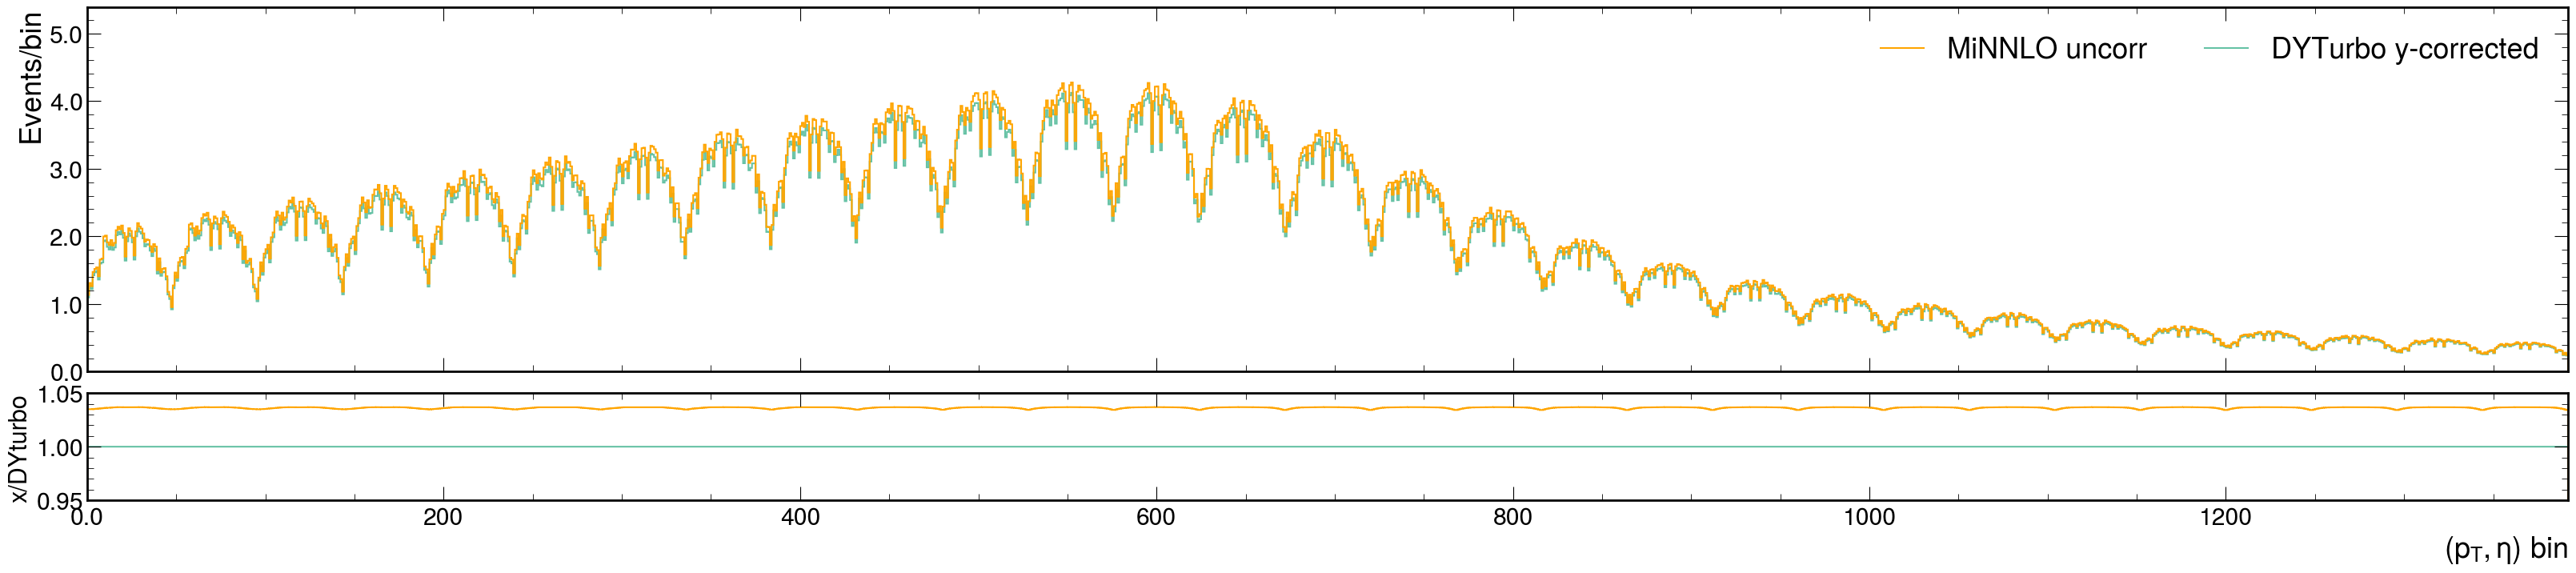

In [58]:
fig = plot_tools.makePlotWithRatioToRef(
            [sel.unrolledHist(sel.signalHistWmass(corr)), 
             sel.unrolledHist(sel.signalHistWmass(uncorr))], 
            ["DYTurbo y-corrected", "MiNNLO uncorr",], 
            colors=['#66c2a5', 'orange',], 
            xlabel="$(p_{T}, \eta$) bin", 
            ylabel="Events/bin",
            rlabel="x/DYturbo",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)

In [60]:
res = pickle.load(lz4.frame.open("../mz_wlike_with_mu_eta_pt_dyturboYOnlyCorr_nnpdf31.pkl.lz4"))
corrZ = input_tools.load_and_scale(res, "ZmumuPostVFP", "nominal")
uncorrZ = input_tools.load_and_scale(res, "ZmumuPostVFP", "nominal_uncorr")

Count is 2


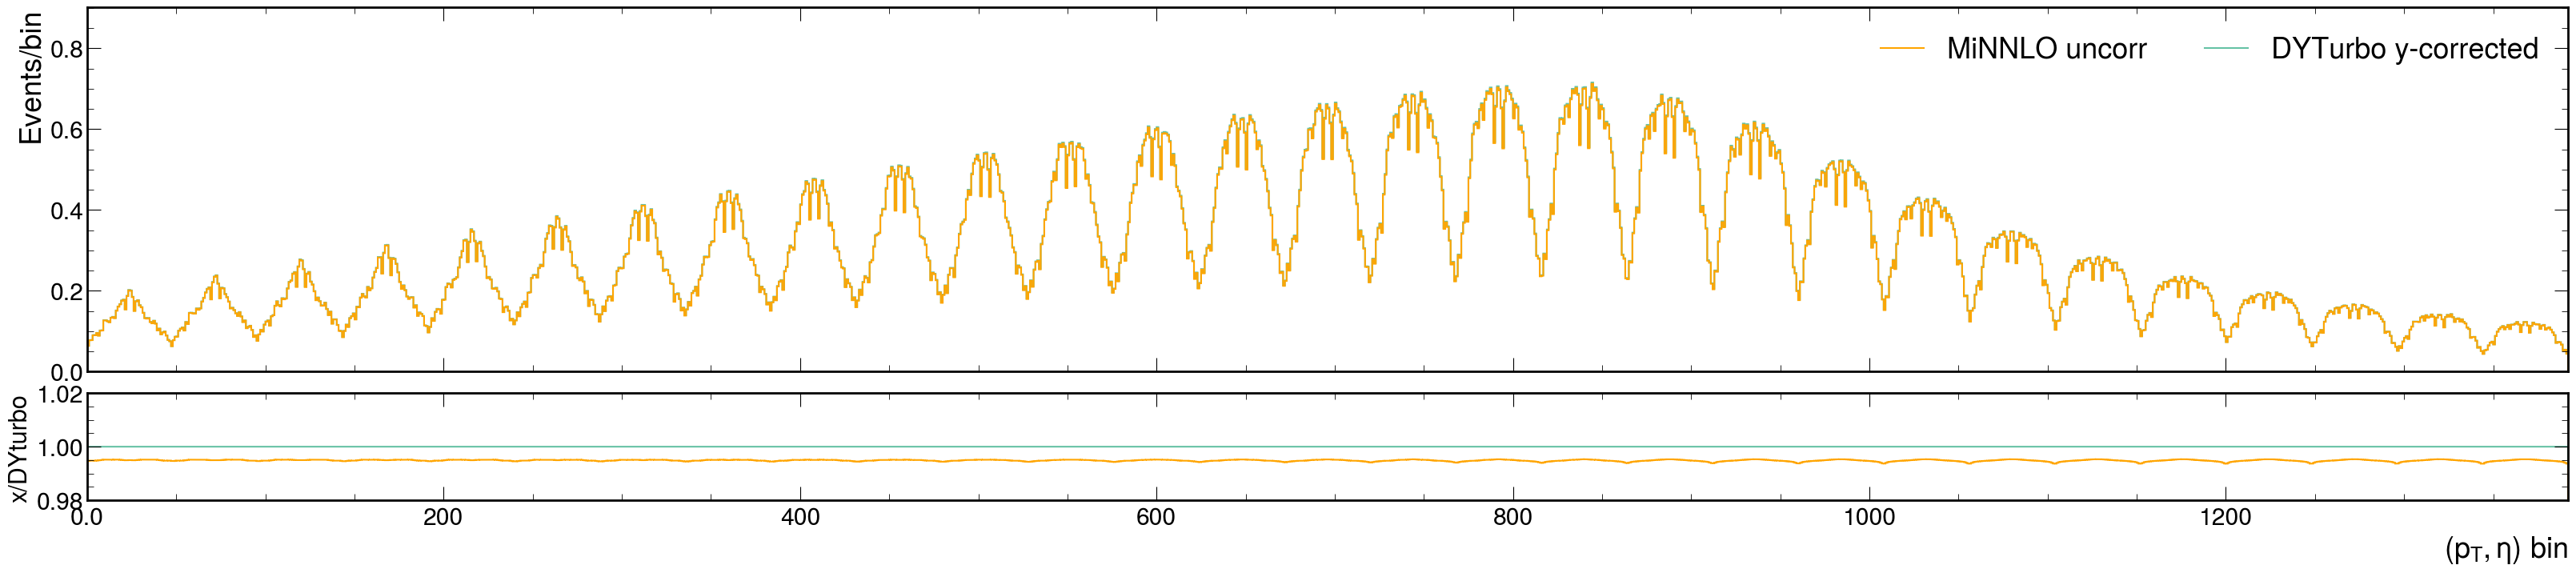

In [63]:
fig = plot_tools.makePlotWithRatioToRef(
            [sel.unrolledHist(corrZ), 
             sel.unrolledHist(uncorrZ)], 
            ["DYTurbo y-corrected", "MiNNLO uncorr",], 
            colors=['#66c2a5', 'orange',], 
            xlabel="$(p_{T}, \eta$) bin", 
            ylabel="Events/bin",
            rlabel="x/DYturbo",
            rrange=[0.98, 1.02],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)

In [64]:
corrZll = input_tools.load_and_scale(res, "ZmumuPostVFP", "dilepton")
uncorrZll = input_tools.load_and_scale(res, "ZmumuPostVFP", "dilepton_uncorr")

Count is 2


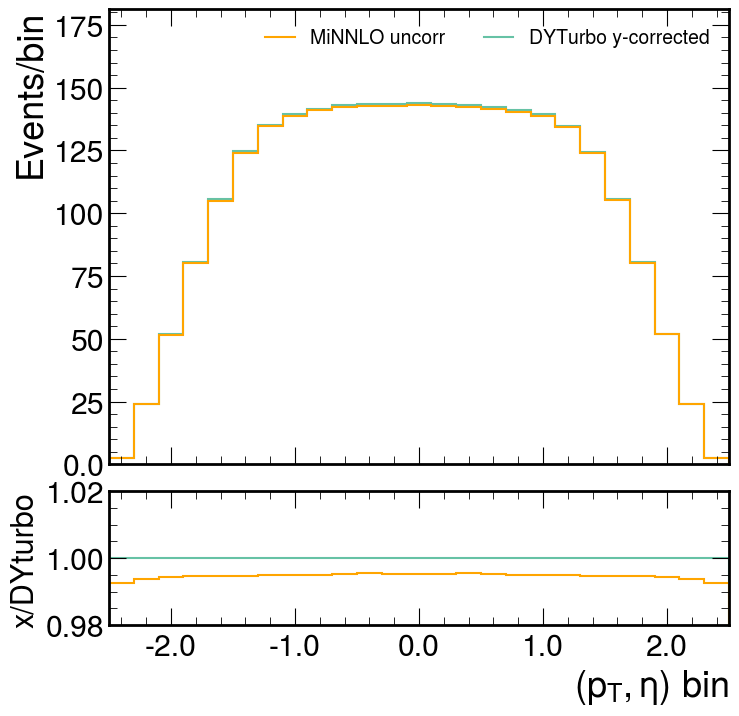

In [68]:
fig = plot_tools.makePlotWithRatioToRef(
            [corrZll.project("yll"), 
             uncorrZll.project("yll")], 
            ["DYTurbo y-corrected", "MiNNLO uncorr",], 
            colors=['#66c2a5', 'orange',], 
            xlabel="$(p_{T}, \eta$) bin", 
            ylabel="Events/bin",
            rlabel="x/DYturbo",
            rrange=[0.98, 1.02],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)